In [1]:
# import necessary libraries
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
from skfuzzy import membership as mp

The input variables have to be defined

In [2]:
# the range for the variables are given
data_redundancy = ctrl.Antecedent(np.arange(0,101,1), 'Data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0,101,1), 'Degradation_level')
error_history = ctrl.Antecedent(np.arange(0,101,1), 'Error_history')


The output variable is defined

In [3]:
# the range for the variables are given
likelihood_error = ctrl.Consequent(np.arange(0, 101, 0.1), 'Error_likelihood')

The membership function for data redundancy is defined

c:\Users\arkha\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


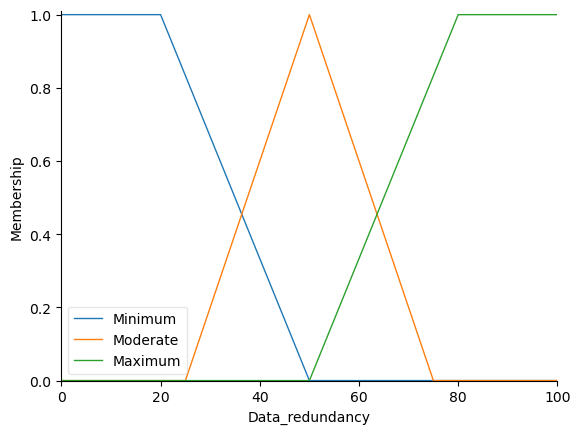

In [4]:
# the ranges for the three levels are specified
data_redundancy['Minimum'] = fuzzy.trapmf(data_redundancy.universe, [0,0,20,50])
data_redundancy['Moderate'] = fuzzy.trimf(data_redundancy.universe, [25,50,75])
data_redundancy['Maximum'] = fuzzy.trapmf(data_redundancy.universe, [50,80,100,100])
data_redundancy.view() # the graph is plotted

The membership function for degradation level is defined

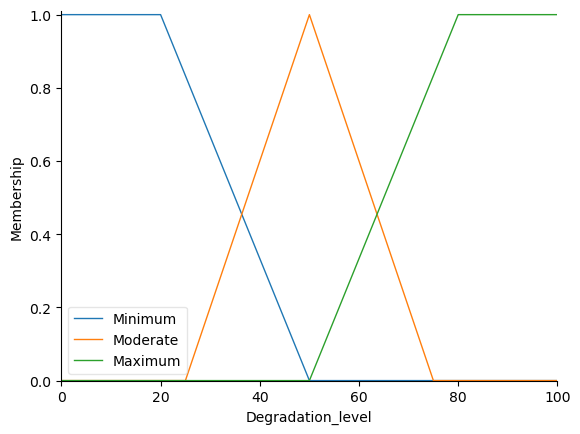

In [5]:
# the ranges for the three levels are specified
degradation_level['Minimum'] = fuzzy.trapmf(degradation_level.universe, [0,0,20,50])
degradation_level['Moderate'] = fuzzy.trimf(degradation_level.universe, [25,50,75])
degradation_level['Maximum'] = fuzzy.trapmf(degradation_level.universe, [50,80,100,100])
degradation_level.view() # the graph is plotted

The membership function for error history is defined

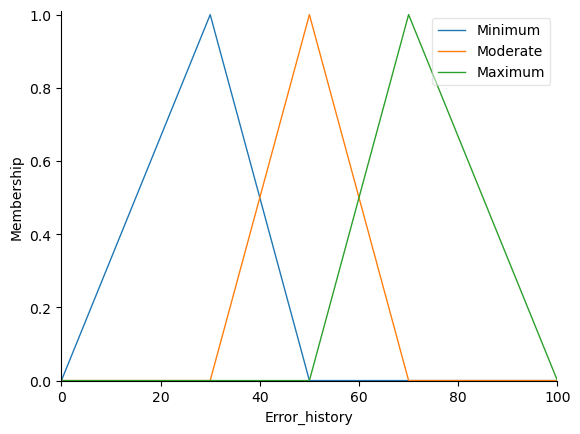

In [6]:
# the ranges for the three levels are specified
error_history['Minimum'] = fuzzy.trimf(error_history.universe, [0,30,50])
error_history['Moderate'] = fuzzy.trimf(error_history.universe, [30,50,70])
error_history['Maximum'] = fuzzy.trimf(error_history.universe, [50,70,100])
error_history.view()# the graph is plotted

The membership function for likelihood of error is defined.

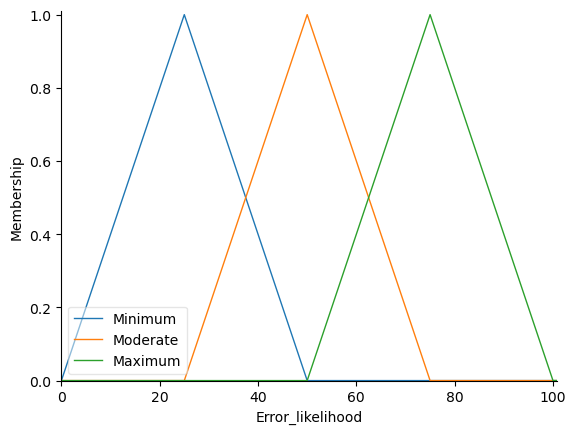

In [7]:
# the ranges for the three levels are specified
likelihood_error['Minimum'] = fuzzy.trimf(likelihood_error.universe, [0,25,50])
likelihood_error['Moderate'] = fuzzy.trimf(likelihood_error.universe, [25,50,75])
likelihood_error['Maximum'] = fuzzy.trimf(likelihood_error.universe, [50,75,100])
likelihood_error.view() # the graph is plotted

The fuzzy rules are defined.

In [8]:
# the rules are mentioned with the singular rules being used as the base
rule_1 = ctrl.Rule(error_history['Maximum'], likelihood_error['Maximum'])
rule_2 = ctrl.Rule(data_redundancy['Minimum'] & (degradation_level['Maximum']) & (error_history['Minimum'] | error_history['Moderate']),likelihood_error['Maximum'])
rule_3 = ctrl.Rule(data_redundancy['Minimum'] & (degradation_level['Moderate']) & (error_history['Minimum']),likelihood_error['Moderate'])
rule_4 = ctrl.Rule(data_redundancy['Minimum'] & (degradation_level['Minimum']) & (error_history['Moderate'] | (error_history['Minimum'])),likelihood_error['Moderate'])
rule_5 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['Maximum'] & error_history['Moderate'],likelihood_error['Moderate'])
rule_6 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['Minimum'] & error_history['Moderate'],likelihood_error['Moderate'])
rule_7 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['Minimum'] & error_history['Minimum'],likelihood_error['Minimum'])
rule_8 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['Moderate'] & error_history['Moderate'],likelihood_error['Moderate'])
rule_9 = ctrl.Rule(data_redundancy['Moderate'] & degradation_level['Moderate'] & error_history['Minimum'],likelihood_error['Moderate'])
rule_10 = ctrl.Rule(data_redundancy['Maximum'] & degradation_level['Maximum'] & error_history['Minimum'],likelihood_error['Moderate'])
rule_11 = ctrl.Rule(data_redundancy['Maximum'] & degradation_level['Maximum'] & error_history['Moderate'],likelihood_error['Maximum'])
rule_12 = ctrl.Rule(data_redundancy['Maximum'] & degradation_level['Moderate'] & error_history['Minimum'],likelihood_error['Minimum'])
rule_13 = ctrl.Rule(data_redundancy['Maximum'] & degradation_level['Moderate'] & error_history['Moderate'],likelihood_error['Moderate'])
rule_14 = ctrl.Rule(data_redundancy['Maximum'] & degradation_level['Minimum'] & error_history['Moderate'],likelihood_error['Minimum'])
rule_15 = ctrl.Rule(data_redundancy['Maximum'] & degradation_level['Minimum'] & error_history['Minimum'], likelihood_error['Minimum'])

The control system for the fuzzy system is defined.

In [9]:
# the rules are the passed to the control system and then they are simulated
likelihood_error_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15])
likelihood_errors = ctrl.ControlSystemSimulation(likelihood_error_ctrl)

Getting the user input.

74.99999999999994


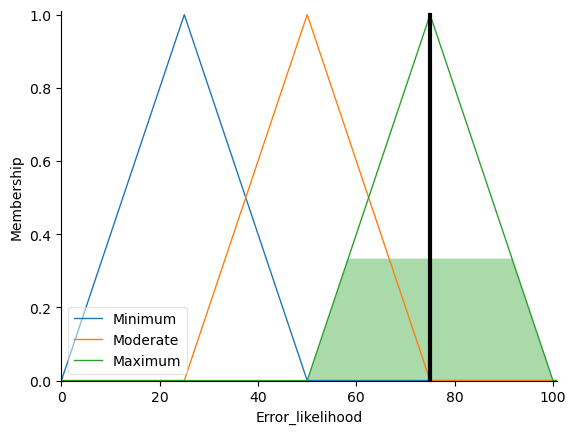

In [10]:
# the inputs are taken from the user
data_redundancy_input = int(input("Enter Redundancy of data value (0-100): "))
degradation_level_input = int(input("Enter the level of degradation (0-100): "))
error_history_input = float(input("Enter the error history (0-100): "))

# the user inputs are entered into the control system
likelihood_errors.input['Data_redundancy'] = int(data_redundancy_input)
likelihood_errors.input['Degradation_level'] = int(degradation_level_input)
likelihood_errors.input['Error_history'] = int(error_history_input)
likelihood_errors.compute() # this is then computed
# the crisp value is obtained
error_likelihood_crisp = likelihood_errors.output["Error_likelihood"]
print(error_likelihood_crisp) # the crisp value is printed
likelihood_error.view(sim=likelihood_errors) # the graph is plotted

Printing the likelihood of error

In [11]:
if error_likelihood_crisp <= 30:
    print("Error Likelihood: Minimum\n")
    
    print("Following could be done for this likelihood of error")
    print("Continue to track performance regularly.")
    print("Test again for validity.")
elif 30 < error_likelihood_crisp <= 60:
    print("Error Likelihood: Moderate\n")

    print("Following could be done for this likelihood of error")
    print("Continue to track performance regularly.")
    print("Scan for specific issues.")
else:
    print("Error Likelihood: Maximum\n")

    print("Following could be done for this likelihood of error")
    print("Identify cause of issue and rectify.")
    print("Scan for specific issues.")

Error Likelihood: Maximum

Following could be done for this likelihood of error
Identify cause of issue and rectify.
Scan for specific issues.
